In [128]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('bmh')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [129]:
# df = pd.read_csv('BTC-USD.csv')
df=pd.read_csv("BTC-USD2.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-20,36753.667969,42462.984375,35050.617188,40782.738281,40782.738281,88281943359
1,2021-05-21,40596.949219,42172.171875,33616.453125,37304.691406,37304.691406,82051616861
2,2021-05-22,37371.031250,38831.054688,35383.683594,37536.632813,37536.632813,57377273240
3,2021-05-23,37531.449219,38289.218750,31227.339844,34770.582031,34770.582031,78469274361
4,2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,67359584098


In [130]:
df.shape

(366, 7)

Text(0.5, 0, 'Date')

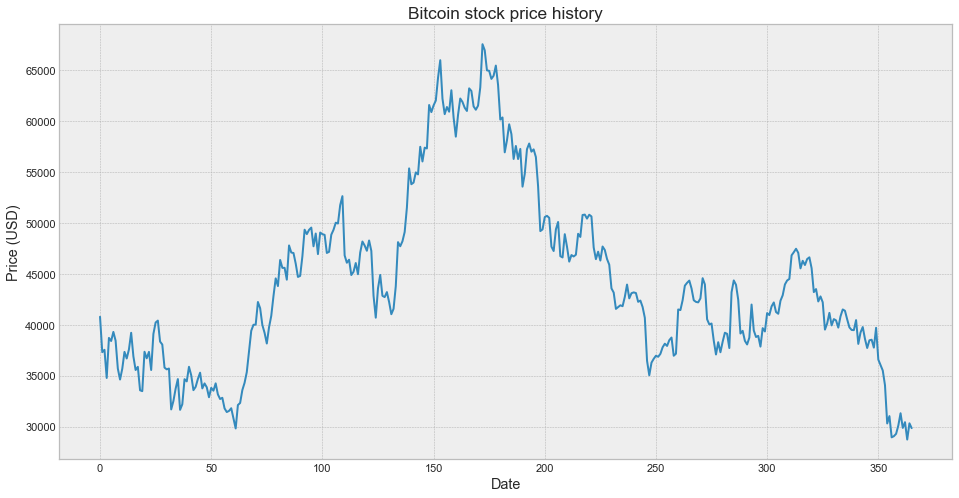

In [131]:
#Visualize close price data
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')
plt.title('Bitcoin stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Date')

In [132]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d").dt.strftime('%m%d').astype(float)
df.index=df['Date']    
print(df)    

        Date          Open          High           Low         Close  \
Date                                                                   
520.0  520.0  36753.667969  42462.984375  35050.617188  40782.738281   
521.0  521.0  40596.949219  42172.171875  33616.453125  37304.691406   
522.0  522.0  37371.031250  38831.054688  35383.683594  37536.632813   
523.0  523.0  37531.449219  38289.218750  31227.339844  34770.582031   
524.0  524.0  34700.363281  39835.140625  34551.082031  38705.980469   
...      ...           ...           ...           ...           ...   
516.0  516.0  31304.375000  31305.341797  29251.884766  29862.917969   
517.0  517.0  29862.408203  30694.490234  29570.302734  30425.857422   
518.0  518.0  30424.478516  30618.716797  28720.271484  28720.271484   
519.0  519.0  28720.359375  30430.751953  28708.955078  30314.333984   
520.0  520.0  30289.017578  30646.810547  29840.212891  29840.212891   

          Adj Close       Volume  
Date                        

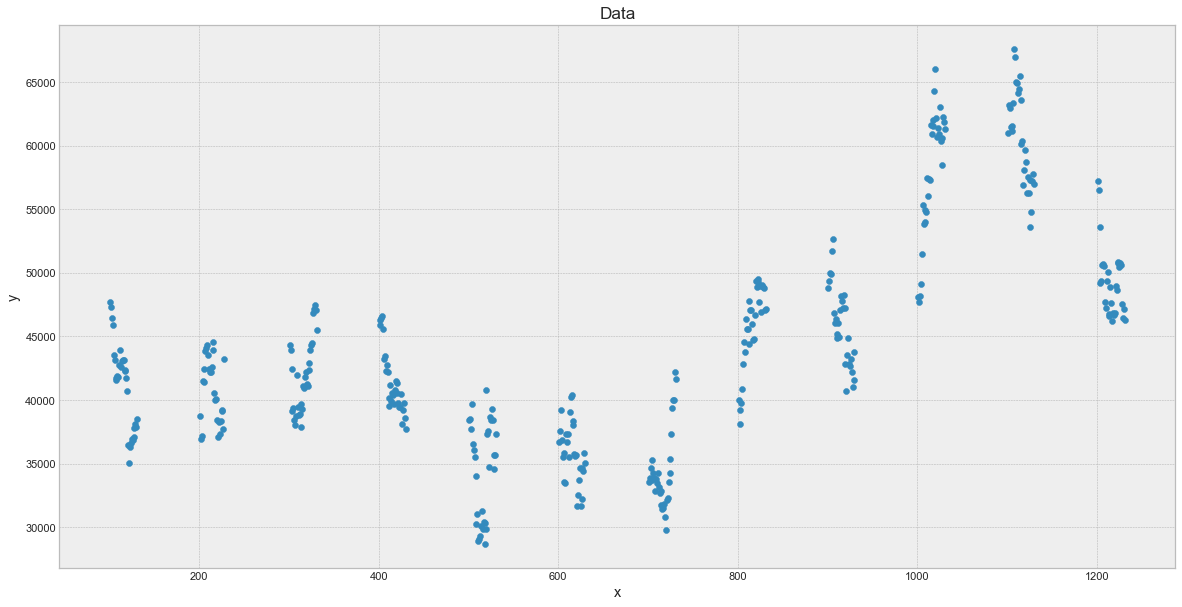

In [133]:
#Visualise Our data
x = np.array(df['Date'] )
y=np.array( df['Close'] )
plt.scatter(x,y)
plt.title("Data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

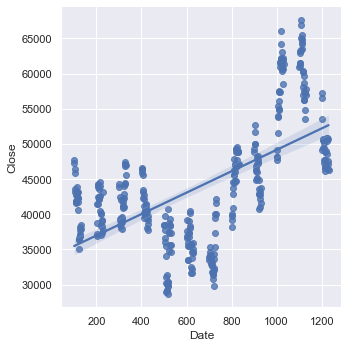

In [134]:
#Visualizing  linear regression models
#pip install seaborn
import seaborn as sns
sns.set_theme(color_codes=True)
sns.lmplot( x="Date",y="Close", data=df)

In [135]:
df = df[['Close']]
df.head(4)

,Close
Date,
520.0,40782.738281
521.0,37304.691406
522.0,37536.632813
523.0,34770.582031


In [136]:
# Create variable to predict 'x' days out the future
future_days = 50
# Create a column (target) shifted 'x' days up
df['Prediction'] = df['Close'].shift(-future_days)
df.head(4)

,Close,Prediction
Date,,
520.0,40782.738281,33798.011719
521.0,37304.691406,33520.519531
522.0,37536.632813,34240.187500
523.0,34770.582031,33155.847656


In [137]:

# Create feature data set, convert it to numpy array and remove last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[40782.738281]
 [37304.691406]
 [37536.632813]
 [34770.582031]
 [38705.980469]
 [38402.222656]
 [39294.199219]
 [38436.96875 ]
 [35697.605469]
 [34616.066406]
 [35678.128906]
 [37332.855469]
 [36684.925781]
 [37575.179688]
 [39208.765625]
 [36894.40625 ]
 [35551.957031]
 [35862.378906]
 [33560.707031]
 [33472.632813]
 [37345.121094]
 [36702.597656]
 [37334.398438]
 [35552.515625]
 [39097.859375]
 [40218.476563]
 [40406.269531]
 [38347.0625  ]
 [38053.503906]
 [35787.246094]
 [35615.871094]
 [35698.296875]
 [31676.693359]
 [32505.660156]
 [33723.027344]
 [34662.4375  ]
 [31637.779297]
 [32186.277344]
 [34649.644531]
 [34434.335938]
 [35867.777344]
 [35040.835938]
 [33572.117188]
 [33897.046875]
 [34668.546875]
 [35287.78125 ]
 [33746.003906]
 [34235.195313]
 [33855.328125]
 [32877.371094]
 [33798.011719]
 [33520.519531]
 [34240.1875  ]
 [33155.847656]
 [32702.025391]
 [32822.347656]
 [31780.730469]
 [31421.539063]
 [31533.068359]
 [31796.810547]
 [30817.832031]
 [29807.347656]
 [32110.

C:\Users\46735\AppData\Local\Temp\ipykernel_68632\712535477.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [138]:
# Create target data set (y), convert it to numpy array get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)


[33798.011719 33520.519531 34240.1875   33155.847656 32702.025391
 32822.347656 31780.730469 31421.539063 31533.068359 31796.810547
 30817.832031 29807.347656 32110.693359 32313.105469 33581.550781
 34292.445313 35350.1875   37337.535156 39406.941406 39995.90625
 40008.421875 42235.546875 41626.195313 39974.894531 39201.945313
 38152.980469 39747.503906 40869.554688 42816.5      44555.800781
 43798.117188 46365.402344 45585.03125  45593.636719 44428.289063
 47793.320313 47096.945313 47047.003906 46004.484375 44695.359375
 44801.1875   46717.578125 49339.175781 48905.492188 49321.652344
 49546.148438 47706.117188 48960.789063 46942.21875  49058.667969
 48902.402344 48829.832031 47054.984375 47166.6875   48847.027344
 49327.722656 50025.375    49944.625    51753.410156 52633.535156
 46811.128906 46091.390625 46391.421875 44883.910156 45201.457031
 46063.269531 44963.074219 47092.492188 48176.347656 47783.359375
 47267.519531 48278.363281 47260.21875  42843.800781 40693.675781
 43574.5078

In [139]:
# Split the data to 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [140]:
#create the model DecisionTreeRegressor
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)
tree_dtr = DecisionTreeRegressor().fit(x_train, y_train)
#create the linjar regression model
lr=LinearRegression().fit(x_train, y_train)

In [141]:
#Get the last "X" rows of the future dataset
x_future= df.drop(['Prediction'], 1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

C:\Users\46735\AppData\Local\Temp\ipykernel_68632\3676189198.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future= df.drop(['Prediction'], 1)[:-future_days]


KeyError: -50

In [ ]:
# show the model tree prediction
tree_prediction= tree_dtr.predict(x_future)
print(tree_prediction)
print()

[46281.644531 39740.320313 46453.566406 34059.265625 45555.992188
 43206.738281 43503.847656 42287.664063 47783.359375 42207.671875
 39521.902344 40127.183594 41166.730469 39935.515625 40553.464844
 40424.484375 39716.953125 42190.652344 41502.75     41374.378906
 40527.363281 39740.320313 39486.730469 39469.292969 40458.308594
 38117.460938 39241.121094 43193.234375 38609.824219 39241.121094
 38469.09375  38529.328125 44895.097656 31780.730469 36575.140625
 36040.921875 35501.953125 34059.265625 30296.953125 60368.011719
 39740.320313 29047.751953 43503.847656 30101.265625 31305.113281
 29862.917969 30425.857422 43961.859375 30314.333984 29840.212891]



In [ ]:
#Show model Linjar regression 
lr_prediction= lr.predict(x_future)
print(lr_prediction)

[44518.236833   44218.63713846 44176.3141065  44164.15766308
 44264.97624676 44779.75510333 44620.95675725 43734.50222829
 43603.2278097  43626.83477315 43189.08245919 42837.9807077
 43151.450075   42895.27376271 43163.51043997 43391.76435246
 43363.52539975 43002.25754406 44421.95517167 44722.64914851
 44611.18508048 44229.99056903 43371.92871818 43440.01592626
 43186.13234732 43093.45817638 43268.27936196 44108.59907573
 43449.56308315 43283.21904434 43311.4499065  43038.47302532
 43508.92839679 43424.0153361  43891.37799548 43841.52545241
 44061.53786268 44162.38071879 43918.2769077  43874.30739571
 44205.9173724  44344.21158075 44620.71706704 44721.11998525
 44760.49897332 45361.07380051 45440.6904139  45528.12983042
 45423.77353979 45029.20390633]


C:\Users\46735\AppData\Local\Temp\ipykernel_17872\838455039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


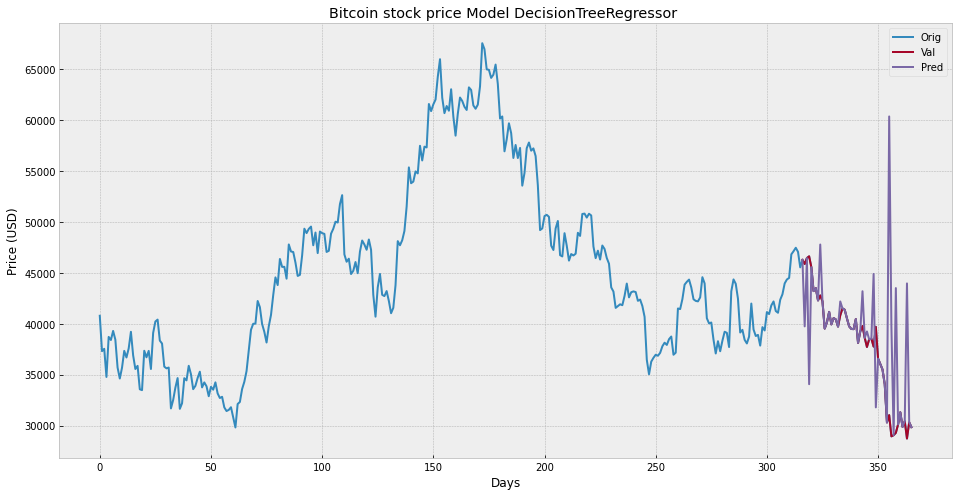

In [ ]:
#Visualize the data with desicion tree model
predictions= tree_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Bitcoin stock price Model DecisionTreeRegressor ')
plt.ylabel('Price (USD)')
plt.xlabel('Days')

plt.plot(df["Close"])
plt.plot(valid[["Close", 'Predictions']])

plt.legend(['Orig', 'Val','Pred'])
plt.show()

C:\Users\46735\AppData\Local\Temp\ipykernel_17872\765717322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


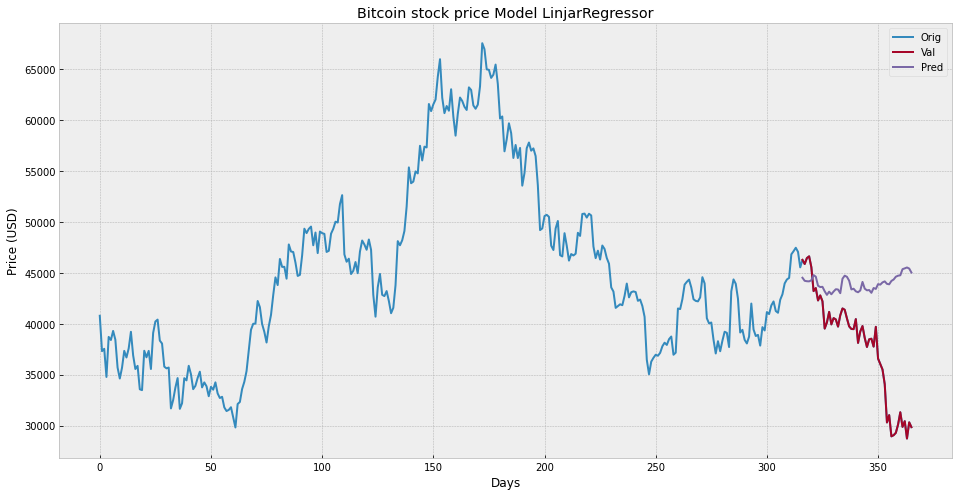

In [ ]:
#Visualize the data with Linjar regression model
predictions= lr_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Bitcoin stock price Model LinjarRegressor')
plt.ylabel('Price (USD)')
plt.xlabel('Days')

plt.plot(df["Close"])
plt.plot(valid[["Close", 'Predictions']])

plt.legend(['Orig', 'Val','Pred'])
plt.show()

In [ ]:
tree_prediction

array([46281.644531, 39740.320313, 46453.566406, 34059.265625,
       45555.992188, 43206.738281, 43503.847656, 42287.664063,
       47783.359375, 42207.671875, 39521.902344, 40127.183594,
       41166.730469, 39935.515625, 40553.464844, 40424.484375,
       39716.953125, 42190.652344, 41502.75    , 41374.378906,
       40527.363281, 39740.320313, 39486.730469, 39469.292969,
       40458.308594, 38117.460938, 39241.121094, 43193.234375,
       38609.824219, 39241.121094, 38469.09375 , 38529.328125,
       44895.097656, 31780.730469, 36575.140625, 36040.921875,
       35501.953125, 34059.265625, 30296.953125, 60368.011719,
       39740.320313, 29047.751953, 43503.847656, 30101.265625,
       31305.113281, 29862.917969, 30425.857422, 43961.859375,
       30314.333984, 29840.212891])

In [ ]:
text_representation = tree.export_text(tree_dtr)
print(text_representation)

|--- feature_0 <= 44635.28
|   |--- feature_0 <= 34525.20
|   |   |--- feature_0 <= 33314.24
|   |   |   |--- feature_0 <= 31585.42
|   |   |   |   |--- feature_0 <= 30670.21
|   |   |   |   |   |--- value: [46091.39]
|   |   |   |   |--- feature_0 >  30670.21
|   |   |   |   |   |--- value: [51753.41]
|   |   |   |--- feature_0 >  31585.42
|   |   |   |   |--- feature_0 <= 32664.00
|   |   |   |   |   |--- feature_0 <= 32249.69
|   |   |   |   |   |   |--- feature_0 <= 31728.71
|   |   |   |   |   |   |   |--- feature_0 <= 31657.24
|   |   |   |   |   |   |   |   |--- value: [47096.95]
|   |   |   |   |   |   |   |--- feature_0 >  31657.24
|   |   |   |   |   |   |   |   |--- value: [45585.03]
|   |   |   |   |   |   |--- feature_0 >  31728.71
|   |   |   |   |   |   |   |--- feature_0 <= 31945.71
|   |   |   |   |   |   |   |   |--- value: [50025.38]
|   |   |   |   |   |   |   |--- feature_0 >  31945.71
|   |   |   |   |   |   |   |   |--- feature_0 <= 32148.49
|   |   |   |   |   |

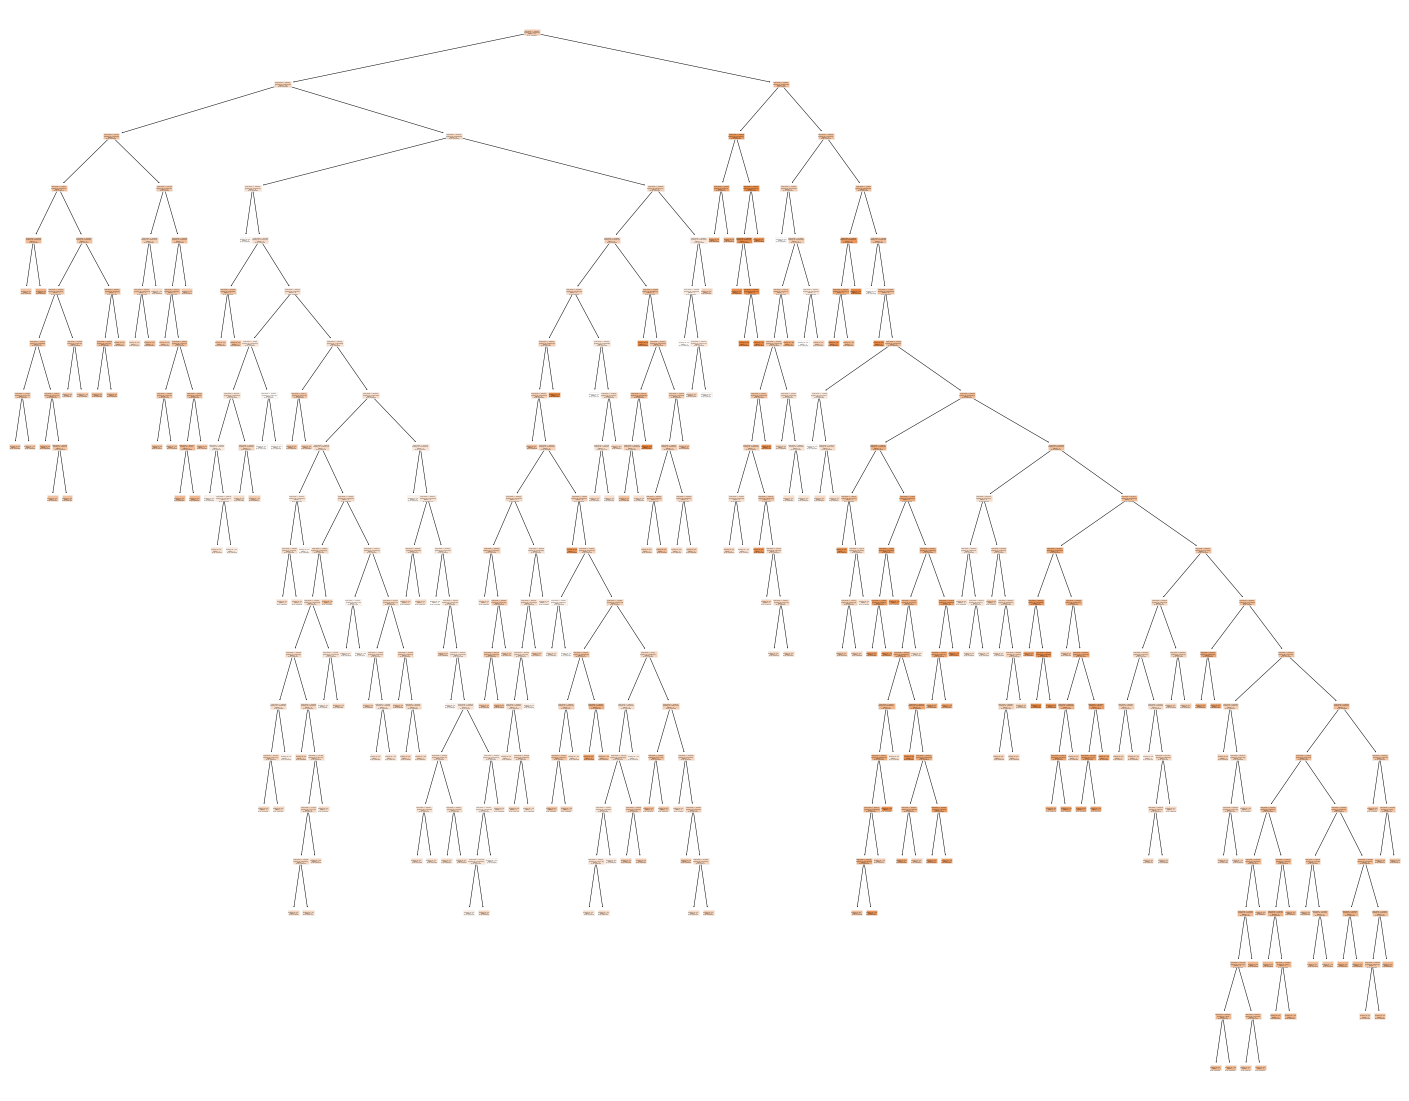

In [ ]:
#Plotting the decision tree with
from sklearn import tree
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(tree_dtr, feature_names=df["Close"], filled=True)   
 
